In [1]:
import geopandas as gpd
import numpy as np
# need to specify location of some certificates for rasterio
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
try:
  import rasterio 
  import rasterio.plot
  import rasterio.merge 
  import rasterio.mask
except:
  !pip install rasterio
  import rasterio as rio
  import rasterio.plot
  import rasterio.merge
  import rasterio.mask
  
try:
  import rasterstats as rs
except:
  !pip install rasterstats  
  import rasterstats as rs
  
try:
  !conda
  import pyproj
except:
  !pip install pyproj
  import pyproj
  
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
  
import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
from matplotlib import pyplot
import pandas as pd


usage: conda [-h] [-V] command ...

conda is a tool for managing and deploying applications, environments and packages.

Options:

positional arguments:
  command
    clean        Remove unused packages and caches.
    config       Modify configuration values in .condarc. This is modeled
                 after the git config command. Writes to the user .condarc
                 file (/home/jovyan/.condarc) by default.
    create       Create a new conda environment from a list of specified
                 packages.
    help         Displays a list of available conda commands and their help
                 strings.
    info         Display information about current conda install.
    init         Initialize conda for shell interaction. [Experimental]
    install      Installs a list of packages into a specified conda
                 environment.
    list         List linked packages in a conda environment.
    package      Low-level conda package utility. (EXPERIMENTAL)
    remove   

In [2]:
import glob
import os
%matplotlib inline
!pip install earthpy
import os
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


In [3]:
game_grid = gpd.read_file('grid/game_grid_all_stats.shp')
game_grid.crs =  "EPSG:3857"
game_grid

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,Health,Utility,Transport,population,SVI,geometry
0,19TBH7264,BH,19T,272000mE,4764000mN,19TBH76,0.042522,0.042522,0.000110,-71.791007,42.999142,10,7,3,15.0,0.2113,"POLYGON ((-7991033.712 5311179.522, -7992397.7..."
1,19TBH7364,BH,19T,273000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.778753,42.999441,10,7,3,11.0,0.2113,"POLYGON ((-7989669.690 5311224.829, -7991033.7..."
2,19TBH7464,BH,19T,274000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.766499,42.999738,10,7,3,14.0,0.2113,"POLYGON ((-7988305.646 5311269.937, -7989669.6..."
3,19TBH7564,BH,19T,275000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.754245,43.000033,10,7,3,21.0,0.2113,"POLYGON ((-7986941.582 5311314.845, -7988305.6..."
4,19TBH7664,BH,19T,276000mE,4764000mN,19TBH76,0.042524,0.042524,0.000110,-71.741990,43.000328,10,7,3,28.0,0.0336,"POLYGON ((-7985577.497 5311359.555, -7986941.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,19TDG1600,DG,19T,416000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,-70.001238,41.551809,10,5,3,0.0,0.0495,"POLYGON ((-7791827.195 5093415.199, -7793161.7..."
15886,19TDG1700,DG,19T,417000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,-69.989249,41.551913,10,5,3,0.0,0.0495,"POLYGON ((-7790492.658 5093430.539, -7791827.1..."
15887,19TDF1599,DF,19T,415000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,-70.013087,41.542698,10,5,3,0.0,0.0495,"POLYGON ((-7793146.168 5092060.201, -7794480.5..."
15888,19TDF1699,DF,19T,416000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,-70.001099,41.542803,10,5,3,0.0,0.0495,"POLYGON ((-7791811.823 5092075.720, -7793146.1..."


In [4]:
local_tile1_location = 'local_tile1.tif'
local_tile2_location = 'local_tile2.tif'
local_tile3_location = 'local_tile3.tif'
local_tile4_location = 'local_tile4.tif'
local_tile5_location = 'local_tile5.tif'

In [5]:
rescaling_factor = 0.3

with rasterio.open(local_tile1_location) as src:
  new_height = int(src.height*rescaling_factor) 
  new_width = int(src.width*rescaling_factor)
  tile1 = src.read(1, out_shape=(new_height, new_width), 
                   resampling=rasterio.enums.Resampling.bilinear) 
  tile1_profile = src.profile
  tile1_profile['transform'] = src.transform * src.transform.scale((src.width/tile1.shape[-1]),
                                                        (src.height/tile1.shape[-2])) 
  tile1_profile['height'] = new_height
  tile1_profile['width'] = new_width
  
  
with rasterio.open(local_tile2_location) as src:
  tile2 = src.read(1, out_shape=(int(src.height*rescaling_factor), 
                                 int(src.width*rescaling_factor)), 
                   resampling=rasterio.enums.Resampling.bilinear)
  tile2_profile = src.profile
  tile2_profile['transform'] = src.transform * src.transform.scale((src.width/tile2.shape[-1]),
                                                        (src.height/tile2.shape[-2]))
  tile2_profile['height'] = new_height
  tile2_profile['width'] = new_width

with rasterio.open(local_tile3_location) as src:
  tile3 = src.read(1, out_shape=(int(src.height*rescaling_factor), 
                                 int(src.width*rescaling_factor)), 
                   resampling=rasterio.enums.Resampling.bilinear)
  tile3_profile = src.profile
  tile3_profile['transform'] = src.transform * src.transform.scale((src.width/tile3.shape[-1]),
                                                        (src.height/tile3.shape[-2]))
  tile3_profile['height'] = new_height
  tile3_profile['width'] = new_width

with rasterio.open(local_tile4_location) as src:
  tile4 = src.read(1, out_shape=(int(src.height*rescaling_factor), 
                                 int(src.width*rescaling_factor)), 
                   resampling=rasterio.enums.Resampling.bilinear)
  tile4_profile = src.profile
  tile4_profile['transform'] = src.transform * src.transform.scale((src.width/tile4.shape[-1]),
                                                        (src.height/tile4.shape[-2]))
  tile4_profile['height'] = new_height
  tile4_profile['width'] = new_width

with rasterio.open(local_tile5_location) as src:
  tile5 = src.read(1, out_shape=(int(src.height*rescaling_factor), 
                                 int(src.width*rescaling_factor)), 
                   resampling=rasterio.enums.Resampling.bilinear)
  tile5_profile = src.profile
  tile5_profile['transform'] = src.transform * src.transform.scale((src.width/tile5.shape[-1]),
                                                        (src.height/tile5.shape[-2]))
  tile5_profile['height'] = new_height
  tile5_profile['width'] = new_width

RasterioIOError: local_tile1.tif: No such file or directory

In [ ]:
# saving the low res versions of the files
tile1_profile['driver'] = 'GTiff'
tile2_profile['driver'] = 'GTiff'
tile3_profile['driver'] = 'GTiff'
tile4_profile['driver'] = 'GTiff'
tile5_profile['driver'] = 'GTiff'
lowres_tile1_loc = 'lowres_tile1.tif'
lowres_tile2_loc = 'lowres_tile2.tif'
lowres_tile3_loc = 'lowres_tile3.tif'
lowres_tile4_loc = 'lowres_tile4.tif'
lowres_tile5_loc = 'lowres_tile5.tif'
with rasterio.open(lowres_tile1_loc, 'w', **tile1_profile) as outfile: # opening file in write mode, ** means expand dictionary, automatically fills in dictionary from this variable
  outfile.write(tile1, 1) # takes raster object and which band you want to write
with rasterio.open(lowres_tile2_loc, 'w', **tile2_profile) as outfile:
  outfile.write(tile2, 1)
with rasterio.open(lowres_tile3_loc, 'w', **tile3_profile) as outfile:
  outfile.write(tile3, 1)
with rasterio.open(lowres_tile4_loc, 'w', **tile4_profile) as outfile:
  outfile.write(tile4, 1)
with rasterio.open(lowres_tile5_loc, 'w', **tile5_profile) as outfile:
  outfile.write(tile5, 1)

In [ ]:
combined_location = 'combined.tif'

In [ ]:
with rasterio.open(lowres_tile1_loc, 'r') as src1:
  with rasterio.open(lowres_tile2_loc, 'r') as src2:
    with rasterio.open(lowres_tile3_loc, 'r') as src3:
        with rasterio.open(lowres_tile4_loc, 'r') as src4:
            with rasterio.open(lowres_tile5_loc, 'r') as src5:
                combined, out_transform = rasterio.merge.merge([src1, src2, src3, src4, src5],
                                                   nodata=src2.profile['nodata'])
   
                combined_meta = src1.profile.copy()
    # .update is a function you can call on profile to replace certain values
                combined_meta.update({'driver':'GTiff', 'count': combined.shape[0],'height': combined.shape[1],'width': combined.shape[2],'transform': out_transform,'crs': src1.crs})
    # we are opening a file in write mode, and writing the data into file
                with rasterio.open(combined_location, 'w', **combined_meta) as dst:
                  dst.write(combined)

NameError: name 'combined_location' is not defined

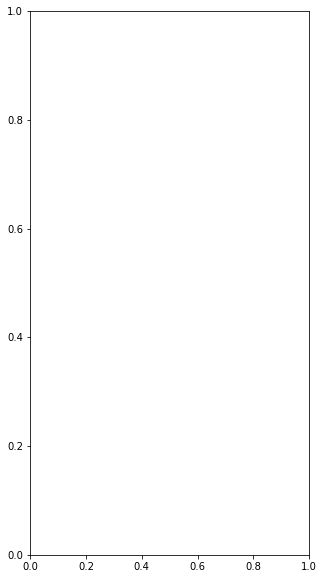

In [6]:
fig, ax = pyplot.subplots(1, figsize=(5, 10))
with rasterio.open(combined_location, 'r') as src:
  print(src.meta)
  combined = src.read(1)
  combined_mask = src.read_masks(1)
  combined_transform = src.profile['transform']
  rasterio.plot.show(np.ma.masked_where(combined_mask==0, combined), 
                     transform=combined_transform, ax = ax)


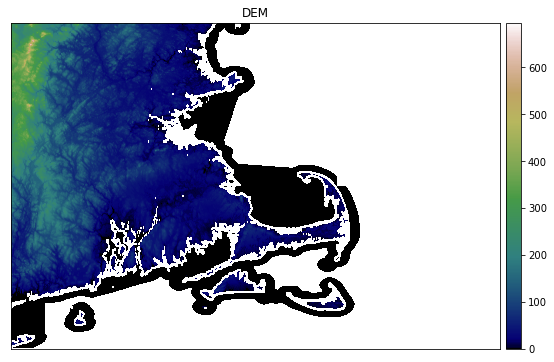

In [7]:
# Download the data needed for this vignette
data = et.data.get_data("vignette-elevation")

# Set the home directory and get the data for the exercise
os.chdir(os.path.join(et.io.HOME, "earth-analytics")) 
combined_location = '/home/jovyan/final-exercise-students-chenm-2/combined.tif'

# Open the DEM with Rasterio
with rasterio.open(combined_location) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan
    
    
# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DEM",
    figsize=(10, 6),
)
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


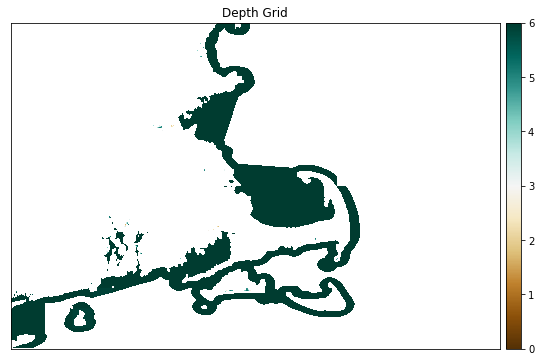

In [8]:
combined_location = '/home/jovyan/final-exercise-students-chenm-2/combined.tif'
    # Download the data needed for this vignette
data = et.data.get_data("vignette-elevation")

    # Set the home directory and get the data for the exercise
os.chdir(os.path.join(et.io.HOME, "earth-analytics")) 
combined_location = '/home/jovyan/final-exercise-students-chenm-2/combined.tif'

# Open the DEM with Rasterio
with rasterio.open(combined_location) as src:
    elevation = src.read(1)
    elevation[elevation<0] = np.nan
    elevation_masks = src.read_masks(1)
    depthmap = 6 - elevation
    depthmap[depthmap < 0] = np.nan
    # Plot the data
ep.plot_bands(
    np.ma.masked_where(elevation_masks==0, depthmap),
    cmap="BrBG",
    title="Depth Grid",
    figsize=(10, 6),
)

plt.show()


In [9]:
# GRAPHING DEPTH_GRID ON A BASEMAP

In [10]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:3857'

with rasterio.open('/home/jovyan/final-exercise-students-chenm-2/combined.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('/home/jovyan/final-exercise-students-chenm-2/reprojected_combined.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


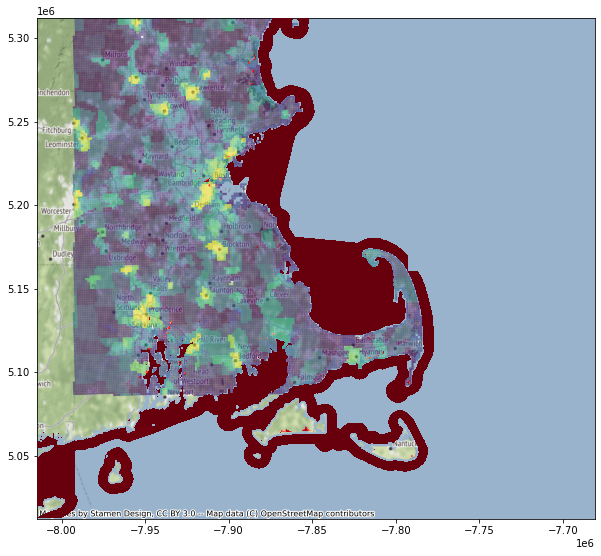

In [11]:
reprojected_combined_location = '/home/jovyan/final-exercise-students-chenm-2/reprojected_combined.tif'
with rasterio.open(reprojected_combined_location, 'r') as src:
    elevation = src.read(1)
    elevation[elevation<0] = np.nan
    elevation_masks = src.read_masks(1)
    depthmap = 6 - elevation
    depthmap[depthmap < 0] = np.nan
    combined_mask = src.read_masks(1)
    combined_transform = src.profile['transform']
    elevation[elevation<0] = np.nan
    elevation_masks = src.read_masks(1)
    
    # Plot the data
    fig, ax = plt.subplots(1, figsize=(10,20))
    rasterio.plot.show(np.ma.masked_where(combined_mask==0, depthmap), 
                     transform=combined_transform, ax = ax, zorder = 1000, cmap='Reds')

shelters = gpd.read_file('/home/jovyan/final-exercise-students-chenm-2/facilities/shelters.shp')
#shelters.to_crs(epsg=3857).plot(figsize=(10,20), ax=ax, alpha = 0.3)
ctx.add_basemap(ax)

#ctx.add_basemap(ax2)

# track = '/home/jovyan/final-exercise-students-chenm-2/likely_track_update.geojson'
# track = gpd.read_file(track)
# speeds = '/home/jovyan/final-exercise-students-chenm-2/wind_speed_update.geojson'
# speeds = gpd.read_file(speeds)
# speeds.to_crs(epsg=3857).plot(ax=ax2,alpha = 0.1, color = 'red')
game_grid.plot('SVI', ax=ax, alpha = 0.6)
#track.to_crs(epsg=3857).plot(alpha = 0.4, color = 'green', ax=ax2)


In [12]:
game_grid.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

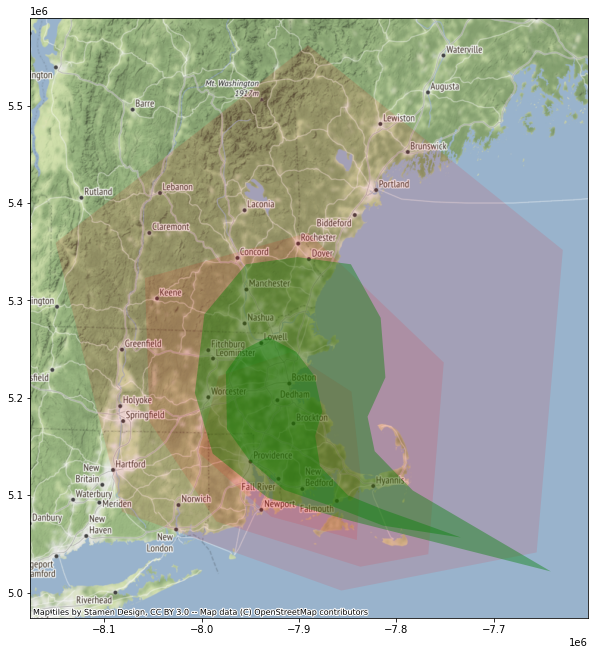

In [13]:
# Plotting Hurricane Track and Wind Speeds
fig, ax2 = plt.subplots(figsize = (10,20))
track = '/home/jovyan/final-exercise-students-chenm-2/likely_track_update.geojson'
track = gpd.read_file(track)
speeds = '/home/jovyan/final-exercise-students-chenm-2/wind_speed_update.geojson'
speeds = gpd.read_file(speeds)
speeds.to_crs(epsg=3857).plot(ax=ax2,alpha = 0.1, color = 'red')
track.to_crs(epsg=3857).plot(alpha = 0.4, color = 'green', ax=ax2)
ctx.add_basemap(ax2)


In [14]:
track = track.to_crs(epsg=3857)
track_40 = track.buffer(40*1000).iloc[1]
track_200 = track.buffer(200*1000).iloc[1]

In [15]:
import rasterstats


In [16]:
game_grid.to_crs('EPSG:4269').to_file("mass.shp")
zs = rasterstats.zonal_stats("mass.shp",
                    'depth_grid.tif',
                    geojson_out=True,
                stats = ['mean', 'max'],
                all_touched=True)
new_game_grid = gpd.GeoDataFrame.from_features(zs)


In [17]:
new_game_grid['in_track'] = game_grid['geometry'].apply(lambda x: x.intersects(track_200)+ x.intersects(track_40))
local_tile1_location = '/home/jovyan/final-exercise-students-chenm-2/combined.tif'
with rasterio.open(local_tile1_location) as src:
     depth = src.read(1)
     print(src.meta)
     src_1 = src.meta
     src_1['nodata'] = np.nan
with rasterio.open('depth_grid.tif', 'w', **src_1) as dst:
      dst.write_band(1, depthmap)


{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -3.4028234663853e+38, 'width': 9722, 'height': 6483, 'count': 1, 'crs': CRS.from_epsg(4269), 'transform': Affine(0.0003086990781342723, 0.0, -72.00055555519407,
       0.0, -0.0003086990781342723, 43.00055555489587)}


In [18]:
new_game_grid.drop(new_game_grid.loc[new_game_grid['population'] == 0], axis = 1)
new_game_grid['evac_zone'] = 0
new_game_grid[(new_game_grid['in_track'] == 2) & (new_game_grid['mean'] > 3)] ['evac_zone'] = 3
new_game_grid[(new_game_grid['evac_zone'] == 0) & (((new_game_grid['in_track'] == 2) & (new_game_grid['mean'] > 0)) | ((new_game_grid['in_track'] == 1) & (new_game_grid['mean'] > 3)))]['evac_zone'] = 2
new_game_grid[(new_game_grid['evac_zone']  == 0) & ((new_game_grid['in_track'] == 1) & (new_game_grid['mean'] > 3) & new_game_grid['SVI'] >= 0.5)]['evac_zone'] = 1

/opt/conda/lib/python3.7/site-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [19]:
new_game_grid

,geometry,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,...,y_centroid,Health,Utility,Transport,population,SVI,mean,max,in_track,evac_zone
0,"POLYGON ((-71.78468 42.99479, -71.79693 42.994...",19TBH7264,BH,19T,272000mE,4764000mN,19TBH76,0.042522,0.042522,0.000110,...,42.999142,10,7,3,15.0,0.2113,NaN,NaN,1,0
1,"POLYGON ((-71.77242 42.99509, -71.78468 42.994...",19TBH7364,BH,19T,273000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,...,42.999441,10,7,3,11.0,0.2113,NaN,NaN,1,0
2,"POLYGON ((-71.76017 42.99539, -71.77242 42.995...",19TBH7464,BH,19T,274000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,...,42.999738,10,7,3,14.0,0.2113,NaN,NaN,1,0
3,"POLYGON ((-71.74792 42.99568, -71.76017 42.995...",19TBH7564,BH,19T,275000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,...,43.000033,10,7,3,21.0,0.2113,NaN,NaN,1,0
4,"POLYGON ((-71.73566 42.99598, -71.74792 42.995...",19TBH7664,BH,19T,276000mE,4764000mN,19TBH76,0.042524,0.042524,0.000110,...,43.000328,10,7,3,28.0,0.0336,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,"POLYGON ((-69.99517 41.54736, -70.00716 41.547...",19TDG1600,DG,19T,416000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,...,41.551809,10,5,3,0.0,0.0495,4.640051,6.000000,2,0
15886,"POLYGON ((-69.98319 41.54746, -69.99517 41.547...",19TDG1700,DG,19T,417000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,...,41.551913,10,5,3,0.0,0.0495,4.513021,6.000000,2,0
15887,"POLYGON ((-70.00702 41.53825, -70.01901 41.538...",19TDF1599,DF,19T,415000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,...,41.542698,10,5,3,0.0,0.0495,4.850481,6.000000,2,0
15888,"POLYGON ((-69.99504 41.53835, -70.00702 41.538...",19TDF1699,DF,19T,416000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,...,41.542803,10,5,3,0.0,0.0495,4.393068,5.272168,2,0


In [20]:
# populations after the evacuation
post_event = gpd.read_file('/home/jovyan/final-exercise-students-chenm-2/post-event-game-grid.geojson')
post_event['population'].sum()

6127218.0

In [21]:
# how many shelters we need
needed_shelters = (new_game_grid['population'].sum() - post_event['population'].sum())*.4
needed_shelters/500
# we need 540 shelters

537.5008

In [22]:
shelters = shelters.to_crs(epsg=3857)


In [23]:
# new_game_grid = new_game_grid.set_crs(epsg=4326, allow_override=True)
# new_game_grid = new_game_grid.to_crs(epsg=3857)

In [34]:
new_game_grid.set_crs(epsg=3857)

,geometry,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,...,y_centroid,Health,Utility,Transport,population,SVI,mean,max,in_track,evac_zone
0,"POLYGON ((-71.78468 42.99479, -71.79693 42.994...",19TBH7264,BH,19T,272000mE,4764000mN,19TBH76,0.042522,0.042522,0.000110,...,42.999142,10,7,3,15.0,0.2113,NaN,NaN,1,0
1,"POLYGON ((-71.77242 42.99509, -71.78468 42.994...",19TBH7364,BH,19T,273000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,...,42.999441,10,7,3,11.0,0.2113,NaN,NaN,1,0
2,"POLYGON ((-71.76017 42.99539, -71.77242 42.995...",19TBH7464,BH,19T,274000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,...,42.999738,10,7,3,14.0,0.2113,NaN,NaN,1,0
3,"POLYGON ((-71.74792 42.99568, -71.76017 42.995...",19TBH7564,BH,19T,275000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,...,43.000033,10,7,3,21.0,0.2113,NaN,NaN,1,0
4,"POLYGON ((-71.73566 42.99598, -71.74792 42.995...",19TBH7664,BH,19T,276000mE,4764000mN,19TBH76,0.042524,0.042524,0.000110,...,43.000328,10,7,3,28.0,0.0336,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,"POLYGON ((-69.99517 41.54736, -70.00716 41.547...",19TDG1600,DG,19T,416000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,...,41.551809,10,5,3,0.0,0.0495,4.640051,6.000000,2,0
15886,"POLYGON ((-69.98319 41.54746, -69.99517 41.547...",19TDG1700,DG,19T,417000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,...,41.551913,10,5,3,0.0,0.0495,4.513021,6.000000,2,0
15887,"POLYGON ((-70.00702 41.53825, -70.01901 41.538...",19TDF1599,DF,19T,415000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,...,41.542698,10,5,3,0.0,0.0495,4.850481,6.000000,2,0
15888,"POLYGON ((-69.99504 41.53835, -70.00702 41.538...",19TDF1699,DF,19T,416000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,...,41.542803,10,5,3,0.0,0.0495,4.393068,5.272168,2,0


In [35]:
flooded_polygons = new_game_grid.loc[new_game_grid['mean'] > 0]['geometry']

In [36]:
len(flooded_polygons)

3434

In [37]:
def is_flooded(shelter):
    buffered = shelter.buffer(1*80)
    output = not any(buffered.intersects(y) for y in flooded_polygons)
    return output

shelters['available'] = shelters['geometry'].apply(is_flooded)

In [38]:
shelters_available = shelters[shelters['available'] == True]

In [39]:
shelters_not_available = shelters[shelters['available'] == False]

In [40]:
from shapely.geometry import MultiPolygon

fp= gpd.GeoDataFrame(flooded_polygons)
fp = fp.to_crs(epsg=3857)
fp_polygon =  MultiPolygon(i for i in fp['geometry'])



ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [ ]:
Zones =[]
Zones = new_game_grid.sort_values(['Ratio'], ascending = False)
Zone = Zones.head(150)
ZoneA = Zone.head(150)
ZoneB = Zone.iloc[50:100]
ZoneC = Zone.tail(50)

In [ ]:
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.set_aspect('equal', 'datalim')
fig.suptitle('AVAILABLE SHELTERS', fontsize=20)
for geom in fp_polygon.geoms:    
    xs, ys = geom.exterior.xy    
    ax.fill(xs, ys, alpha=0.1, fc='r', ec='none')

#shelters.to_crs(epsg=3857).plot(ax=ax, color = 'blue')
shelters_available.plot(ax=ax, color = 'blue', edgecolors = 'b', alpha = 0.25 )
# shelters[shelters['is flooded'] == 1].plot(ax=ax, color = 'blue')

ctx.add_basemap(ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.set_aspect('equal', 'datalim')
fig.suptitle('NON AVAILABLE SHELTERS', fontsize=20)
for geom in fp_polygon.geoms:    
    xs, ys = geom.exterior.xy    
    ax.fill(xs, ys, alpha=0.5, fc='r', ec='none')

#shelters.to_crs(epsg=3857).plot(ax=ax, color = 'blue')
shelters_not_available.plot(ax=ax, color = 'purple', zorder = 1000)
# shelters[shelters['is flooded'] == 1].plot(ax=ax, color = 'blue')
game_grid.plot('SVI', ax=ax, alpha = 0.6)
ctx.add_basemap(ax)
plt.show()

In [ ]:
count = 0
for i in range(len(new_game_grid)):
    if (new_game_grid.loc[count, 'in_track'] == 2) & (new_game_grid.loc[count, 'mean'] >3):
        new_game_grid.loc[count, 'evac_zone'] = 3
    elif (new_game_grid.loc[count, 'evac_zone'] == 0) & (((new_game_grid.loc[count, 'in_track'] == 2) & (new_game_grid.loc[count, 'mean'] > 0)) | ((new_game_grid.loc[count, 'in_track'] == 1) & (new_game_grid.loc[count,'mean'] > 3))):
        new_game_grid.loc[count, 'evac_zone'] = 2
    elif (new_game_grid.loc[count, 'evac_zone']  == 0) & ((new_game_grid.loc[count,'in_track'] == 1) & (new_game_grid.loc[count ,'mean'] > 3) & (new_game_grid.loc[count, 'SVI'] >= 0.5)):
        new_game_grid.loc[count, 'evac_zone'] = 1
    count+=1


In [ ]:
len(new_game_grid[new_game_grid['evac_zone']==0])

In [ ]:
len(new_game_grid[new_game_grid['Ratio'] > 0])

In [ ]:
Zones =[]
Zones = new_game_grid.sort_values(['Ratio'], ascending = False)
Zone = Zones.head(150)
ZoneA = Zone.head(150)
ZoneB = Zone.iloc[50:100]
ZoneC = Zone.tail(50)

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,10))
ZoneA.plot(ax=ax, color = 'red')
ZoneB.plot(ax=ax, color = 'orange')
ZoneC.plot(ax=ax, color = 'green')
ctx.add_basemap(ax)